# Predicting Parkinson’s Disease Using Voice Biomarkers with a Fully Connected Neural Network

## Introduction

Parkinson’s Disease (PD) is a progressive neurodegenerative disorder that affects movement, often leading to symptoms such as tremors, rigidity, and speech impairments. Early diagnosis of PD is crucial for effective management, but traditional diagnostic methods can be invasive, time-consuming, and costly. Recent research has shown that voice analysis can serve as a non-invasive biomarker for PD detection, as the disease often impacts vocal characteristics, resulting in measurable changes like increased jitter (frequency variation), shimmer (amplitude variation), and noise in the voice.

This project, titled **"Predicting Parkinson’s Disease Using Voice Biomarkers with a Fully Connected Neural Network"**, aims to develop a machine learning model to predict PD using voice data. We utilize the **Oxford Parkinson's Disease Detection Dataset** from the UCI Machine Learning Repository, which contains 22 biomedical voice features (e.g., jitter, shimmer, HNR) extracted from voice recordings of 31 individuals (23 with PD, 8 healthy). A fully connected neural network (FCNN) is trained on these features to classify individuals as having PD or being healthy. The model is evaluated using metrics such as accuracy, precision, recall, and specificity, and its performance is visualized through training loss curves, confusion matrices, and feature importance analysis.

For testing, the project processes a pre-recorded voice sample (e.g., a phrase like "Hello hello hello" repeated for 5 seconds) to extract the same voice features, using the `parselmouth` library to interface with Praat for feature extraction. The trained FCNN model then predicts whether the individual might have PD, providing confidence scores for both classes (Healthy and PD). This approach demonstrates the potential of voice-based, non-invasive PD detection using deep learning, with applications in early diagnosis and telemedicine.


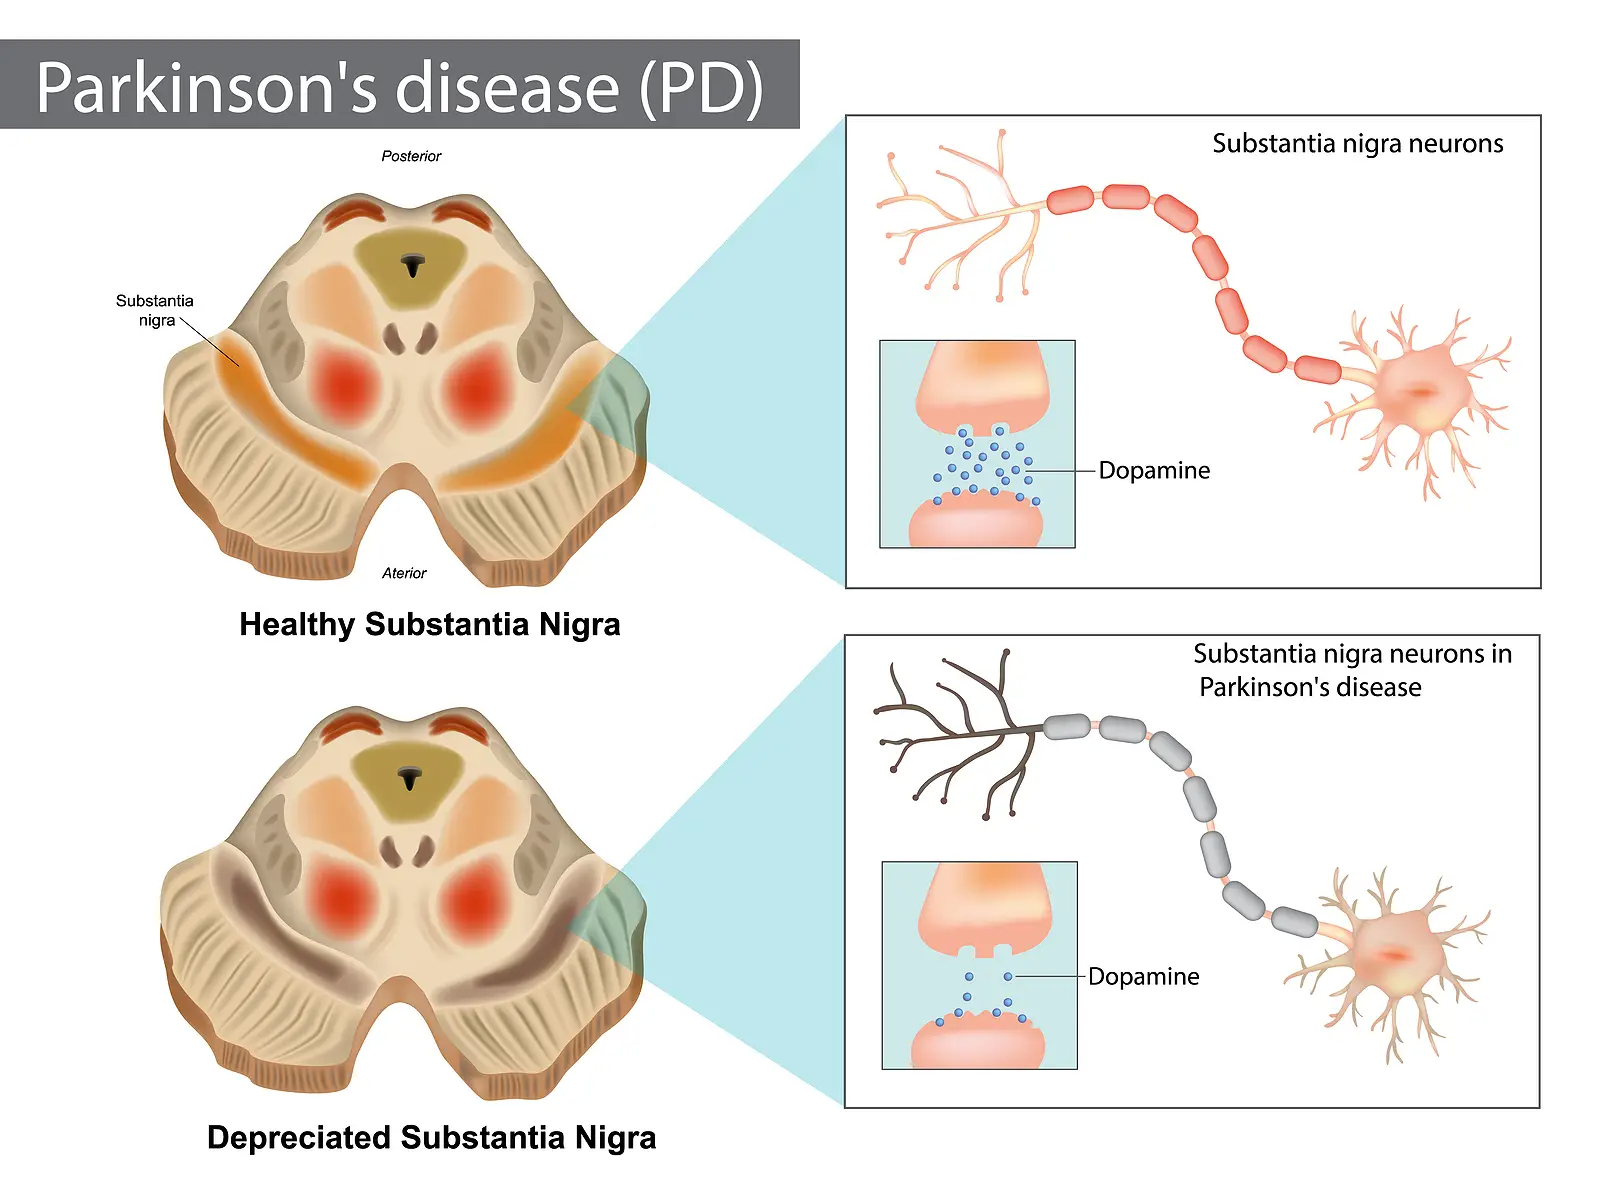

# DATASET DESCRIPTION

This project utilizes the **Oxford Parkinson's Disease Detection Dataset** from the UCI Machine Learning Repository to predict Parkinson’s Disease (PD) using voice data. Below is a detailed description of the dataset.

### Overview
- **Source**: UCI Machine Learning Repository ([link](https://archive.ics.uci.edu/dataset/174/parkinson+s+disease+classification)).
- **Creators**: The dataset was created by Max Little at the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado.
- **Purpose**: The dataset is designed to facilitate the classification of individuals as having PD or being healthy based on biomedical voice measurements. It aims to support research into non-invasive PD detection using voice as a biomarker.
- **Publication**: The dataset is associated with the study by Little et al. (2008), *"Suitability of Dysphonia Measurements for Telemonitoring of Parkinson’s Disease"*, published in *IEEE Transactions on Biomedical Engineering*.

### Dataset Characteristics
- **Type**: Multivariate dataset.
- **Number of Instances**: 195 voice recordings.
- **Number of Subjects**: 31 individuals (23 with PD, 8 healthy).
  - Each individual has approximately 6 recordings.
- **Area**: Life sciences (biomedical voice analysis).
- **Attribute Characteristics**: Real-valued features.
- **Number of Attributes**: 24 (22 voice features, 1 identifier, 1 label).
- **Missing Values**: None.

### Features
The dataset contains 22 voice features extracted from each recording, along with an identifier and a label:
- **Identifier**:
  - `name`: ASCII subject name and recording number (e.g., identifier for each recording).
- **Voice Features (22 features)**:
  - **Fundamental Frequencies**:
    - `MDVP:Fo(Hz)`: Average vocal fundamental frequency.
    - `MDVP:Fhi(Hz)`: Maximum vocal fundamental frequency.
    - `MDVP:Flo(Hz)`: Minimum vocal fundamental frequency.
  - **Jitter (Frequency Variation)**:
    - `MDVP:Jitter(%)`, `MDVP:Jitter(Abs)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP`: Measures of variation in fundamental frequency, capturing tremor-like effects in the voice.
  - **Shimmer (Amplitude Variation)**:
    - `MDVP:Shimmer`, `MDVP:Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `MDVP:APQ`, `Shimmer:DDA`: Measures of variation in amplitude, reflecting breathiness or vocal instability.
  - **Noise Measures**:
    - `NHR`, `HNR`: Measures of the ratio of noise to tonal components in the voice, indicating hoarseness.
  - **Nonlinear Features**:
    - `RPDE`, `DFA`, `spread1`, `spread2`, `D2`, `PPE`: Nonlinear measures of voice dynamics and complexity, capturing irregularity in vocal patterns.
- **Label**:
  - `status`: Health status (1 = PD, 0 = Healthy).

### Data Format
- **File**: `parkinsons.data` (CSV format).
- **Shape**: `(195, 24)`—195 recordings, 24 columns (22 features + `name` + `status`).
- **Recording Type**: The dataset does not include raw audio recordings. Instead, it provides pre-extracted voice features, likely computed from sustained vowel sounds (e.g., "aaah").

### Relevance to PD Detection
Voice data is a valuable biomarker for PD because the disease often affects speech through symptoms such as:
- **Tremor**: Leads to jitter (frequency variation).
- **Breathiness**: Leads to shimmer (amplitude variation).
- **Hoarseness**: Reflected in noise measures (HNR/NHR).
- **Irregularity**: Captured by nonlinear features (RPDE, DFA, etc.).

These voice characteristics are quantified in the dataset, enabling machine learning models to distinguish PD patients from healthy individuals.

### Citation
If you use this dataset, please cite the following paper:
- Little MA, McSharry PE, Hunter EJ, Ramig LO (2008). *"Suitability of Dysphonia Measurements for Telemonitoring of Parkinson’s Disease"*, *IEEE Transactions on Biomedical Engineering*.

This dataset provides a robust foundation for training a Fully Connected Neural Network (FCNN) to predict PD, supporting the project’s goal of non-invasive, voice-based diagnosis.

# DATA LOADING

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('parkinsons/parkinsons.data')
print("Dataset shape:", data.shape)
print("Columns:", data.columns)

# Inspect the dataset description
with open('parkinsons/parkinsons.names', 'r') as f:
    print("Dataset description:\n", f.read())

Dataset shape: (195, 24)
Columns: Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
Dataset description:
 Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorde

### Data Preprocessing

This section preprocesses the dataset by normalizing the voice features using StandardScaler. We define the feature columns (excluding 'name' and 'status'), normalize the features, and prepare the input features (X) and labels (y). The data is then split into training and testing sets.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Define feature columns (exclude 'name' and 'status')
sensor_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
               'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
               'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
               'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
               'spread1', 'spread2', 'D2', 'PPE']
label_col = 'status'

# Normalize the feature data
scaler = StandardScaler()
data[sensor_cols] = scaler.fit_transform(data[sensor_cols])

# Prepare features (X) and labels (y)
X = data[sensor_cols].values
y = data[label_col].values

print("Processed data shape:", X.shape)
print("Labels shape:", y.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute and save feature means for all features
feature_means = data[sensor_cols].mean().values
with open('feature_means.pkl', 'wb') as f:
    pickle.dump(feature_means, f)

# Compute and save nonlinear means for the specific nonlinear features
nonlinear_cols = ['RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
nonlinear_means = data[nonlinear_cols].mean().values
with open('nonlinear_means.pkl', 'wb') as f:
    pickle.dump(nonlinear_means, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Processed data shape: (195, 22)
Labels shape: (195,)


### Model Initialization

This section defines the Fully Connected Neural Network (FCNN) architecture, initializes the model, and sets up the loss function and optimizer. The FCNN has three layers with ReLU activations and is trained using the Adam optimizer with a learning rate of 0.001.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Step 1: Create a custom dataset for PyTorch
class ParkinsonsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ParkinsonsDataset(X_train, y_train)
test_dataset = ParkinsonsDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 2: Define the FCNN model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Model parameters
input_size = len(sensor_cols)
hidden_size = 64
num_classes = 2

# Instantiate the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FCNN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Model Architecture Breakdown

This section provides a detailed breakdown of the Fully Connected Neural Network (FCNN) architecture used in the project. The model consists of an input layer, two hidden layers with ReLU activations, and an output layer for binary classification (Healthy vs. PD).

### Breakdown of the Architecture

#### Input Layer
- **Size**: `input_size` (22 features in this case, corresponding to the 22 voice features from the dataset: `MDVP:Fo(Hz)`, `MDVP:Fhi(Hz)`, ..., `PPE`).
- **Description**: This layer receives the input features directly from the dataset.

#### First Hidden Layer
- **Linear Transformation**: `fc1` (`nn.Linear(input_size, hidden_size)`).
  - Maps the input size (22 neurons) to `hidden_size` (64 neurons, as defined in the script).
- **Activation**: ReLU (Rectified Linear Unit).
  - Applies the ReLU activation function to introduce non-linearity.

#### Second Hidden Layer
- **Linear Transformation**: `fc2` (`nn.Linear(hidden_size, hidden_size)`).
  - Maps `hidden_size` (64 neurons) to `hidden_size` (64 neurons again).
- **Activation**: ReLU.
  - Another ReLU activation to add non-linearity.

#### Output Layer
- **Linear Transformation**: `fc3` (`nn.Linear(hidden_size, num_classes)`).
  - Maps `hidden_size` (64 neurons) to `num_classes` (2, for binary classification: Healthy vs. PD).
- **No Activation in the Output**: The output logits are used directly for binary classification.
  - During prediction, `torch.softmax` is applied to compute probabilities for the two classes (Healthy and PD).

### Summary of Layers
- **Input Layer**: 22 neurons (one for each voice feature).
- **Hidden Layer 1**: 64 neurons, Linear + ReLU.
- **Hidden Layer 2**: 64 neurons, Linear + ReLU.
- **Output Layer**: 2 neurons (logits for Healthy and PD).

This architecture is a fully connected neural network, meaning every neuron in one layer is connected to every neuron in the next layer, allowing the model to learn complex patterns in the voice features for PD classification.

![Voice Neural Network Architecture](voice_nn_architecture.png)


### Plotting Train/Val Loss Curves

This section trains the FCNN for 50 epochs and plots the training loss over time. We track the average loss per epoch and visualize it to monitor the model's convergence during training.

Epoch [1/50], Loss: 0.6528
Epoch [2/50], Loss: 0.5832
Epoch [3/50], Loss: 0.5309
Epoch [4/50], Loss: 0.4864
Epoch [5/50], Loss: 0.4456
Epoch [6/50], Loss: 0.4110
Epoch [7/50], Loss: 0.3824
Epoch [8/50], Loss: 0.3579
Epoch [9/50], Loss: 0.3357
Epoch [10/50], Loss: 0.3175
Epoch [11/50], Loss: 0.3021
Epoch [12/50], Loss: 0.2853
Epoch [13/50], Loss: 0.2719
Epoch [14/50], Loss: 0.2575
Epoch [15/50], Loss: 0.2466
Epoch [16/50], Loss: 0.2300
Epoch [17/50], Loss: 0.2175
Epoch [18/50], Loss: 0.2036
Epoch [19/50], Loss: 0.1923
Epoch [20/50], Loss: 0.1828
Epoch [21/50], Loss: 0.1711
Epoch [22/50], Loss: 0.1594
Epoch [23/50], Loss: 0.1510
Epoch [24/50], Loss: 0.1434
Epoch [25/50], Loss: 0.1313
Epoch [26/50], Loss: 0.1241
Epoch [27/50], Loss: 0.1175
Epoch [28/50], Loss: 0.1092
Epoch [29/50], Loss: 0.1037
Epoch [30/50], Loss: 0.0984
Epoch [31/50], Loss: 0.0940
Epoch [32/50], Loss: 0.0870
Epoch [33/50], Loss: 0.0862
Epoch [34/50], Loss: 0.0773
Epoch [35/50], Loss: 0.0736
Epoch [36/50], Loss: 0.0706
E

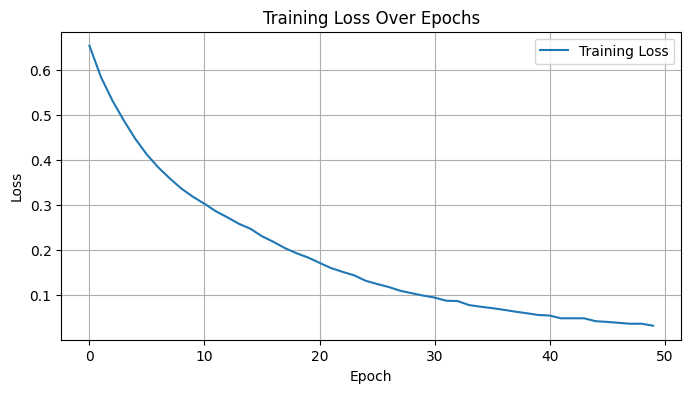

In [4]:
import matplotlib.pyplot as plt

# Train the model
num_epochs = 50
train_losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Save the model
torch.save(model.state_dict(), 'parkinsons_model.pth')

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('training_loss.png')
plt.show()

### Plotting Accuracies

This section evaluates the trained model on the test set and computes performance metrics: accuracy, precision, recall (sensitivity), and specificity. These metrics provide a comprehensive view of the model's classification performance.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluate the model
model.eval()
y_true = []
y_pred = []
y_pred_probs = []  # To store prediction probabilities
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        probabilities = torch.softmax(outputs, dim=1)  # Compute probabilities
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_probs.extend(probabilities.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # Sensitivity
specificity = recall_score(y_true, y_pred, pos_label=0)  # Specificity for negative class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8974
Precision: 0.9118
Recall (Sensitivity): 0.9688
Specificity: 0.5714


### Showing Predictions

This section displays the predictions on the test set in a table format, including true labels, predicted labels, confidence scores for each class (Healthy and PD), and whether the prediction was correct. The results are saved to a CSV file for further analysis.

In [6]:
# Show predictions as a table
label_map = {0: 'Healthy', 1: 'PD'}
results_df = pd.DataFrame({
    'True Label': [label_map[label] for label in y_true],
    'Predicted Label': [label_map[label] for label in y_pred],
    'Confidence (Healthy)': [prob[0] for prob in y_pred_probs],
    'Confidence (PD)': [prob[1] for prob in y_pred_probs],
    'Correct': [true == pred for true, pred in zip(y_true, y_pred)]
})
print("Prediction Results on Test Set:")
print(results_df)
results_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Prediction Results on Test Set:
   True Label Predicted Label  Confidence (Healthy)  Confidence (PD)  Correct
0          PD              PD          2.876727e-09         1.000000     True
1          PD              PD          2.287996e-02         0.977120     True
2          PD              PD          4.590876e-05         0.999954     True
3          PD              PD          3.911674e-02         0.960883     True
4          PD              PD          3.020720e-07         1.000000     True
5          PD              PD          3.011683e-03         0.996988     True
6          PD              PD          2.139916e-08         1.000000     True
7          PD              PD          5.329178e-02         0.946708     True
8          PD              PD          3.562801e-04         0.999644     True
9          PD              PD          4.807212e-01         0.519279     True
10    Healthy              PD          6.607773e-02         0.933922    False
11         PD              PD   

### Confusion Matrix

This section visualizes the confusion matrix to show the model's performance in terms of true positives, true negatives, false positives, and false negatives. The matrix is plotted using a heatmap with labels for Healthy and PD classes.

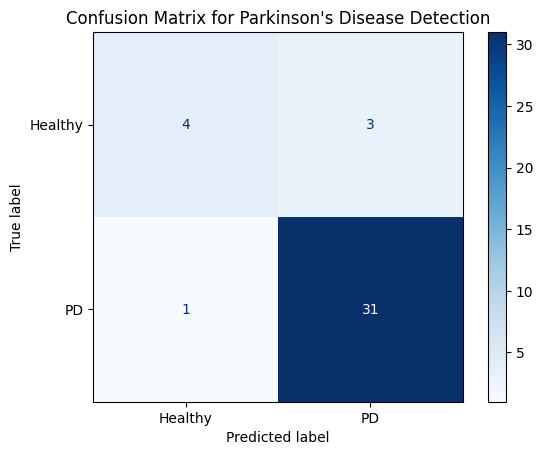

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Healthy', 'PD'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Parkinson\'s Disease Detection')
plt.savefig('confusion_matrix.png')
plt.show()

### Showing Graphs Feature Importance

This section computes and visualizes the feature importance using a gradient-based method. We calculate the gradients of the model's output (PD class) with respect to the input features and plot the average gradient magnitude for each feature, highlighting which voice features contribute most to PD prediction.

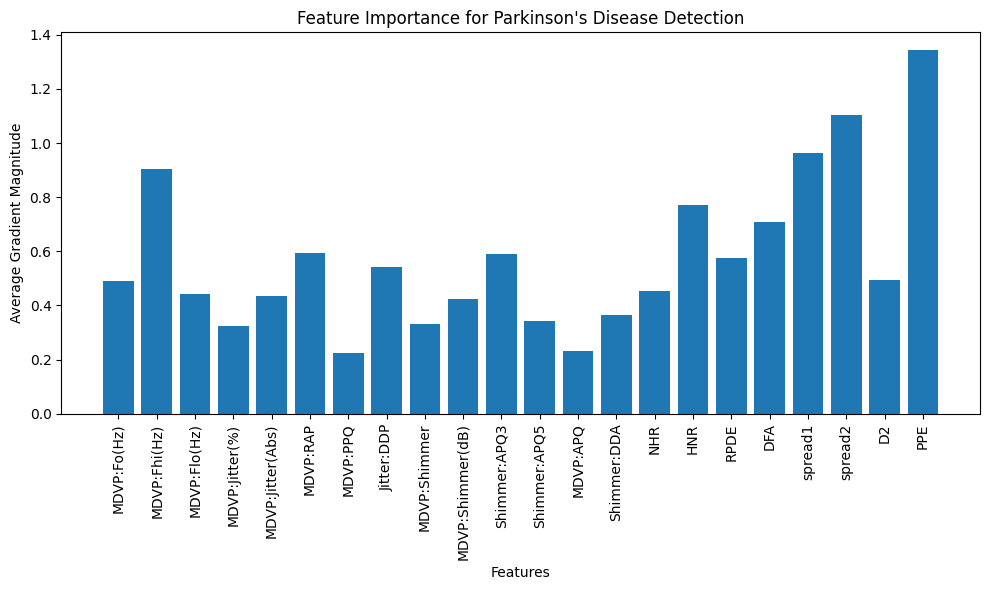

In [8]:
# Visualize feature importance using gradient-based method
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
X_test_tensor.requires_grad = True
outputs = model(X_test_tensor)
outputs[:, 1].sum().backward()  # Gradient w.r.t. PD class
gradients = X_test_tensor.grad.abs().mean(dim=0).cpu().numpy()

plt.figure(figsize=(10, 6))
plt.bar(sensor_cols, gradients)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Average Gradient Magnitude')
plt.title('Feature Importance for Parkinson\'s Disease Detection')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()